## Работа с данными с помощью Pandas

Будем работать с историей заказов одной платформ по доставке еды.

1) Загрузим исходные данные.

In [1]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('files/orders_history.csv', sep=',')

2) Посмотрим на первые 5 строк файла.

In [ ]:
# df.head(2)
df.tail()

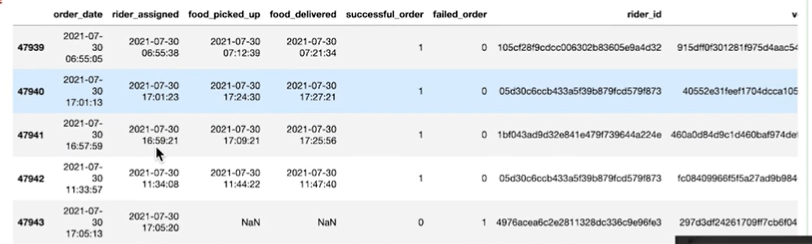

По умолчанию выводится 20 столбцов и 60 строк. Можно изменить, воспользовавшись следующей командой:

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
# Ещё очень полезная опция
pd.set_option('display.precision', 3)

3) Посмотрим на размер данных, названия признаков и их типы.

In [ ]:
# 47944 наблюдений и 9 колонок
df.shape

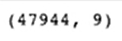

In [ ]:
df.shape[0]

In [ ]:
df.columns

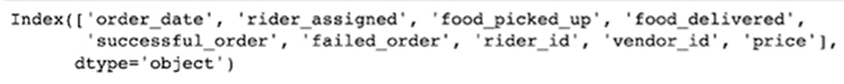

4) Посмотрим общую информацию по датафрейму.

Для просмотра числовых статистик можно воспользоваться методом *describe*:

In [ ]:
df.describe()

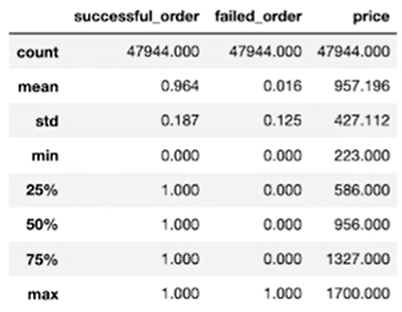

In [ ]:
df.describe(include=['object'])

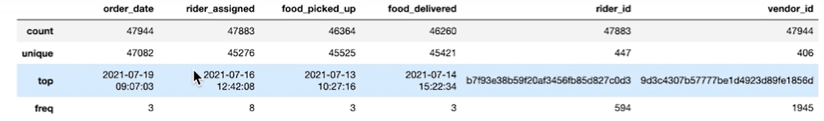

Также по нечисловым признакам можно изучить распределение:

In [ ]:
df.vendor_id.value_counts(dropna=False)[:10]

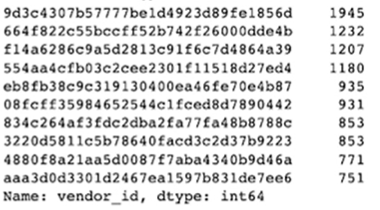

Информация о колонках датафрейма:

In [ ]:
df.info()

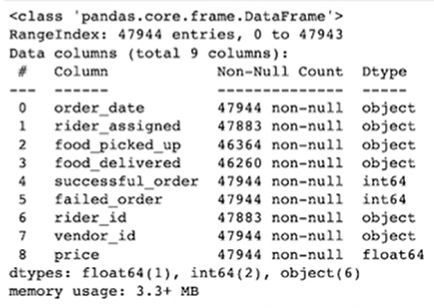

В случае работы с большими датасетами занимается память - критичный фактор:

In [ ]:
for dtype in ['float', 'int', 'object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print('Average memory usage for {} columns: {:03.2f} MB'.format(dtype, mean_usage_mb))

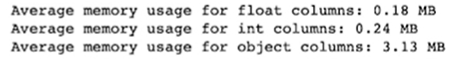

Не забываем, что мы можем закодировать колонки типа object в числовые эквиваленты, например, с помощью pd.factorize.

5) Изменим тип колонок в том случае, если это необходимо.

In [ ]:
df['price'] = df['price'].astyoe('float32')

In [ ]:
# Обратить внимание, как изменился размер занимаемой памяти
print(df.info())

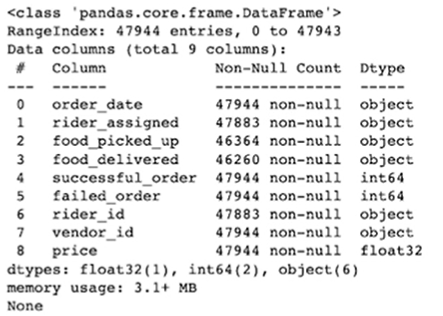

### Тип данных КАТЕГОРИЯ

Отдельный тип данных в Pandas, которому стоит уделить внимание, так как он позволяет более эффективно с категориальными признаками.

Что такое категориальные признаки?

In [ ]:
[(col, df[col].nunique()) for col in df.columns]

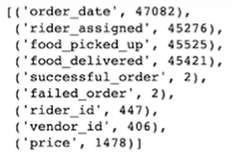

In [ ]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                    columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

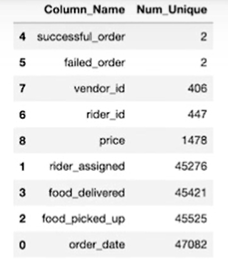

Вендор (ресторан) - отличный кандидат для категориального признака.

In [ ]:
df_with_cat = df.copy()

In [ ]:
df_with_cat['vendor_id'] = df_with_cat['vendor_id'].astype('category')

Зачем нужны категориальные признаки в Pandas:
- позволяют более эффективно обрабатывать категориальные признаки;
- многие питоновские библиотеки имеют встроенные методы по работе с категориальными признаками;
- такие признаки занимают меньше места и также положительно сказываются на производительности.

In [ ]:
print(df_with_cat.info())

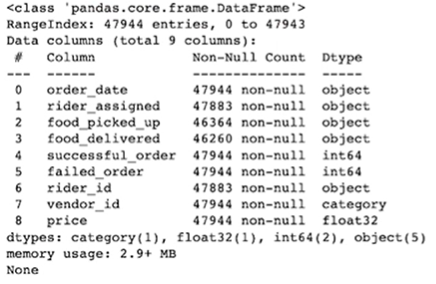

In [ ]:
%%timeit
df.groupby('vendor_id')['price'].mean().to_frame()

In [ ]:
%%timeit
df_with_cat.groupby('vendor_id')['price'].mean().to_frame()

Заметный прирост производительности!

Используйте данный тип с осторожностью, всегда выполняйте необходимую предобработку данных.

6) Применить к данным требуемые операции.

In [ ]:
# Сортировка
df.sort_values(by=['vendor_id', 'price'],
               ascending=[True, False]).head(2)

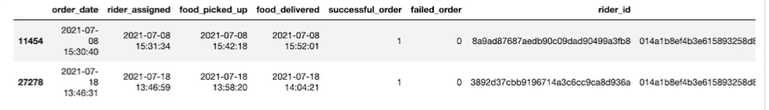

In [ ]:
# Извлечение данных
df.iloc[:, 0:4]

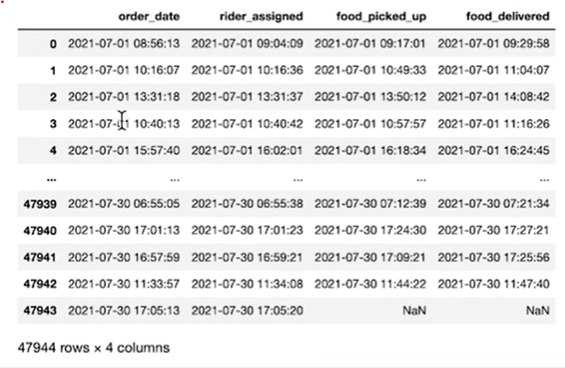

In [ ]:
df[df['vendor_id'] == '014a1b8ef4b3e615893258d810b88a96']['price'].mean()

In [ ]:
df[df['vendor_id'] == '014a1b8ef4b3e615893258d810b88a96']['price'].min()

### Группировка данных

In [ ]:
# Группировка данных
#df.groupby(by=grouping_columns)[columns_to_show].function()

df.groupby(by='vendor_id')['price'].max()

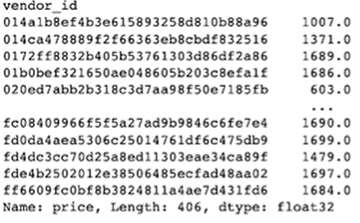

In [ ]:
df.groupby(by='vendor_id')['price'].agg([np.mean, np.std, np.min, np.max])

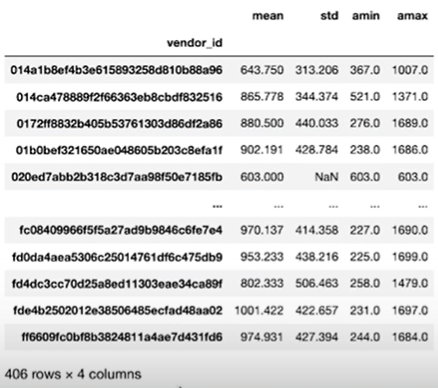

In [ ]:
# Получить из Серии - Датафрейм
df.groupby(by='vendor_id')['price'].mean().reset_index()

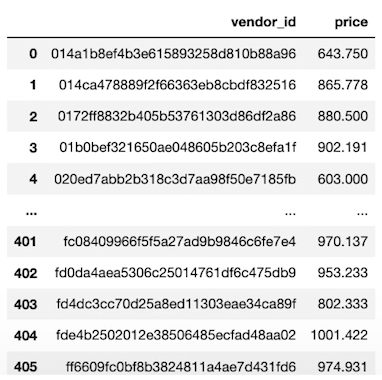